In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon

# Load the dataset
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [2]:
# Select numerical variables
numerical_vars = data.select_dtypes(include=['float64', 'int64'])

In [8]:
numerical_vars

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


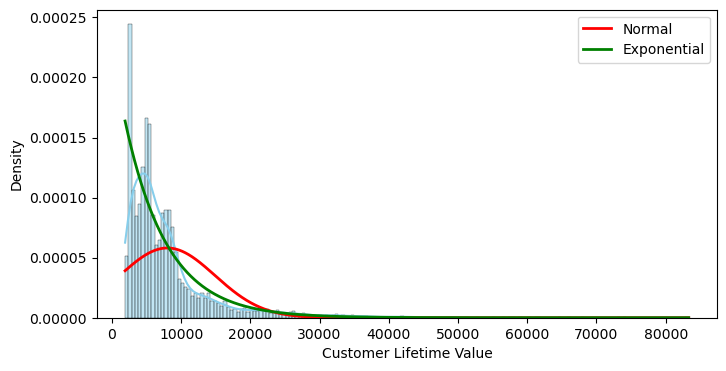

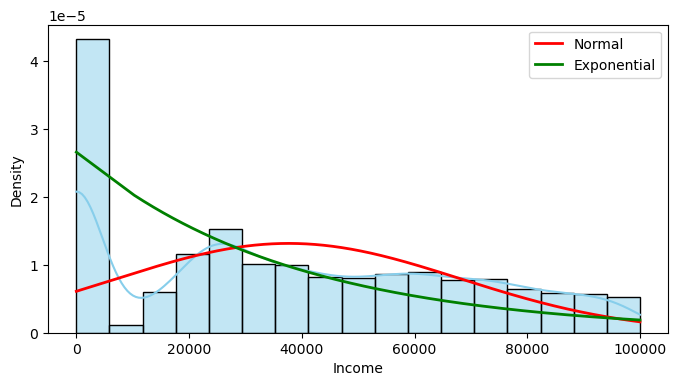

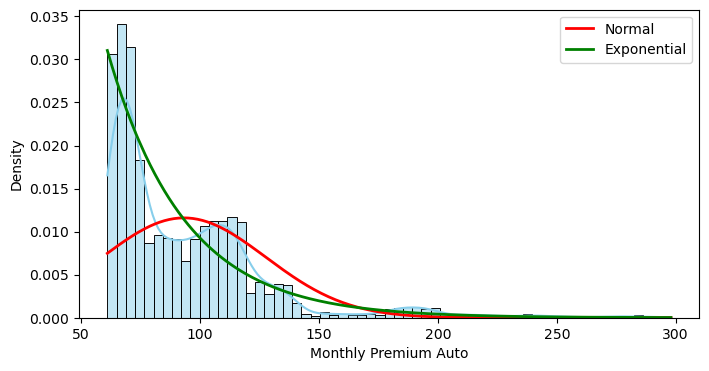

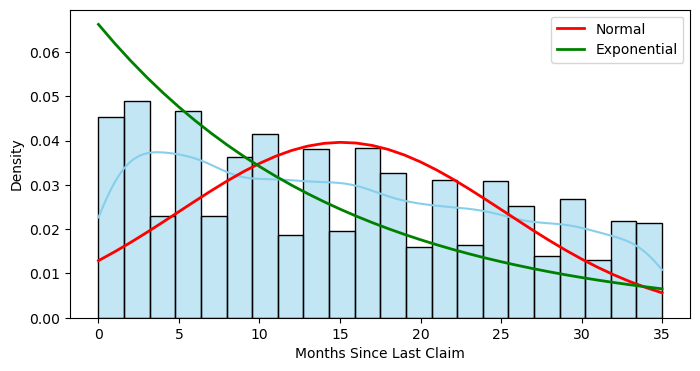

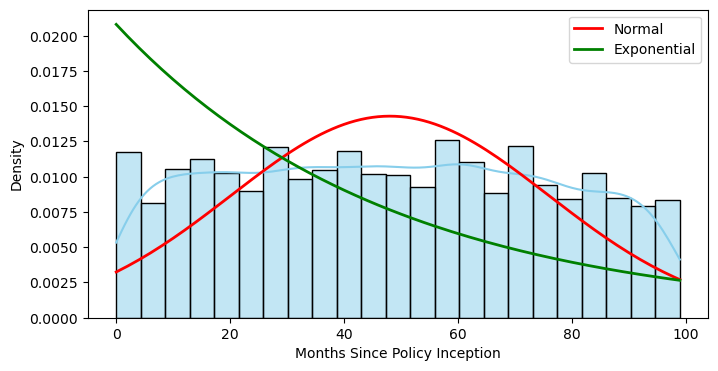

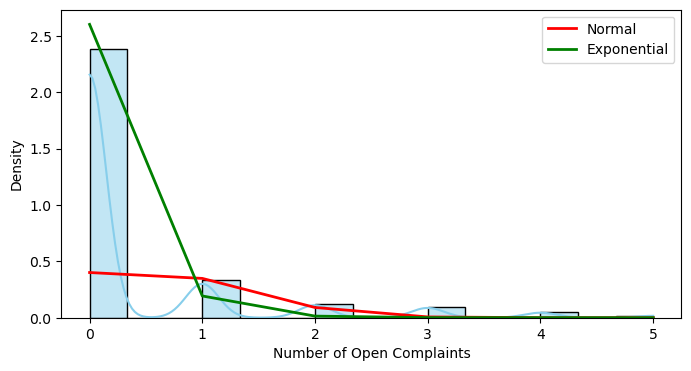

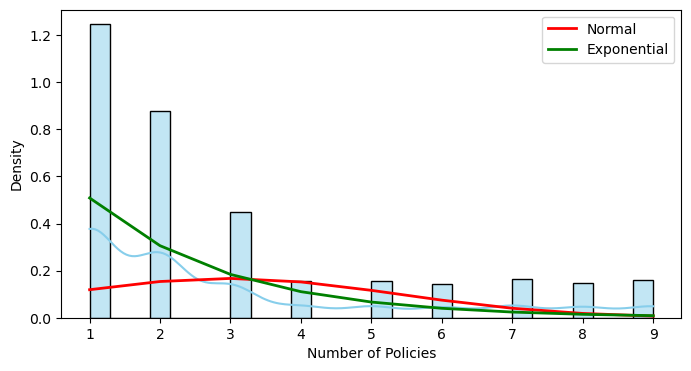

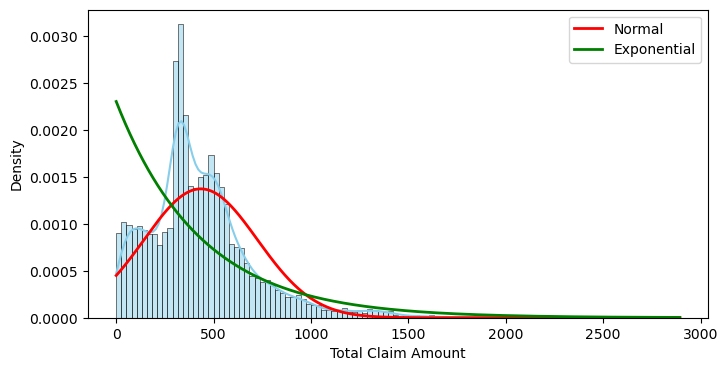

In [3]:
# Plot distribution for each numerical variable
for column in numerical_vars.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numerical_vars[column], kde=True, stat='density', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Density')

    # Fit normal distribution
    loc, scale = norm.fit(numerical_vars[column])
    x = sorted(numerical_vars[column])
    pdf = norm.pdf(x, loc=loc, scale=scale)
    plt.plot(x, pdf, 'r-', lw=2, label='Normal')

    # Fit exponential distribution
    loc_exp, scale_exp = expon.fit(numerical_vars[column])
    pdf_exp = expon.pdf(x, loc=loc_exp, scale=scale_exp)
    plt.plot(x, pdf_exp, 'g-', lw=2, label='Exponential')

    plt.legend()
    plt.show()


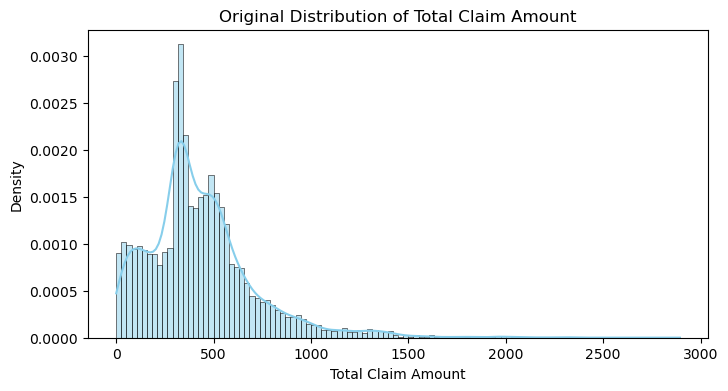

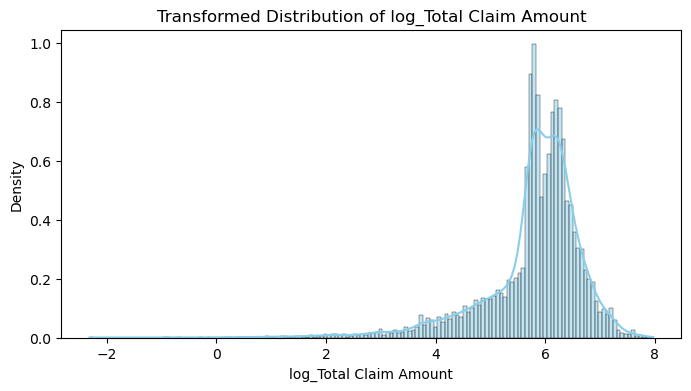

In [10]:
import numpy as np

# Apply logarithmic transformation to the variable 'x'
numerical_vars['log_Total Claim Amount'] = np.log(numerical_vars['Total Claim Amount'])

# Plot the original distribution of 'x'
plt.figure(figsize=(8, 4))
sns.histplot(numerical_vars['Total Claim Amount'], kde=True, stat='density', color='skyblue')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.title('Original Distribution of Total Claim Amount')
plt.show()

# Plot the transformed distribution of 'log_x'
plt.figure(figsize=(8, 4))
sns.histplot(numerical_vars['log_Total Claim Amount'], kde=True, stat='density', color='skyblue')
plt.xlabel('log_Total Claim Amount')
plt.ylabel('Density')
plt.title('Transformed Distribution of log_Total Claim Amount')
plt.show()
